In [1]:
import numpy as np
import pandas as pd

In [4]:
with open("spam.csv", "r", encoding="windows-1252") as src:
    data = src.read()

with open("spam_utf8.csv", "w", encoding="utf-8") as dest:
    dest.write(data)

In [5]:
df = pd.read_csv("spam_utf8.csv")

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

# STEP 1 : Cleaning the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# Removing the extra unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [13]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Renaming the columns to match semantics
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [15]:
# Coverting textual information to numerical information
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# Checking for duplicate values
df.duplicated().sum()

403

In [22]:
# Removing the duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

# STEP 2 : Exploratory Data Analysis (EDA)

In [24]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

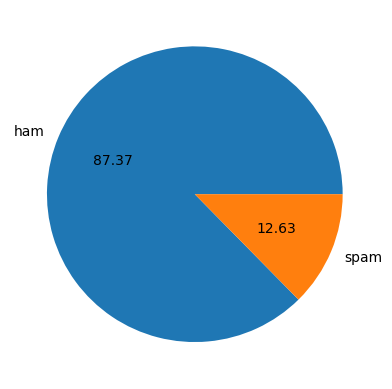

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [26]:
# We can thus infer that our data is imbalanced

In [34]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Mozeel
[nltk_data]     Vanwani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Mozeel
[nltk_data]     Vanwani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
df['num_characters'] = df['text'].apply(len)

In [36]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# Now adding number of words for each sms
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
# Now adding number of sentences for each sms
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [56]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
# Analyzing for ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
# Analyzing for spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [59]:
# From this we can infer that spam messages are generally longer in terms of characters, words as well as sentences
# Plotting this observation
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

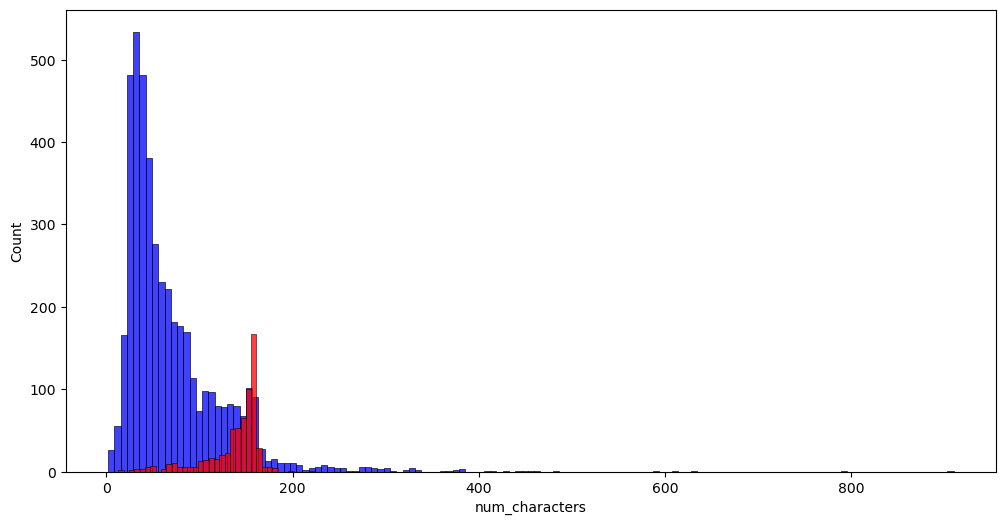

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color='blue') # ham messages
sns.histplot(df[df['target'] == 1]['num_characters'],color='red') # spam messages

<Axes: xlabel='num_words', ylabel='Count'>

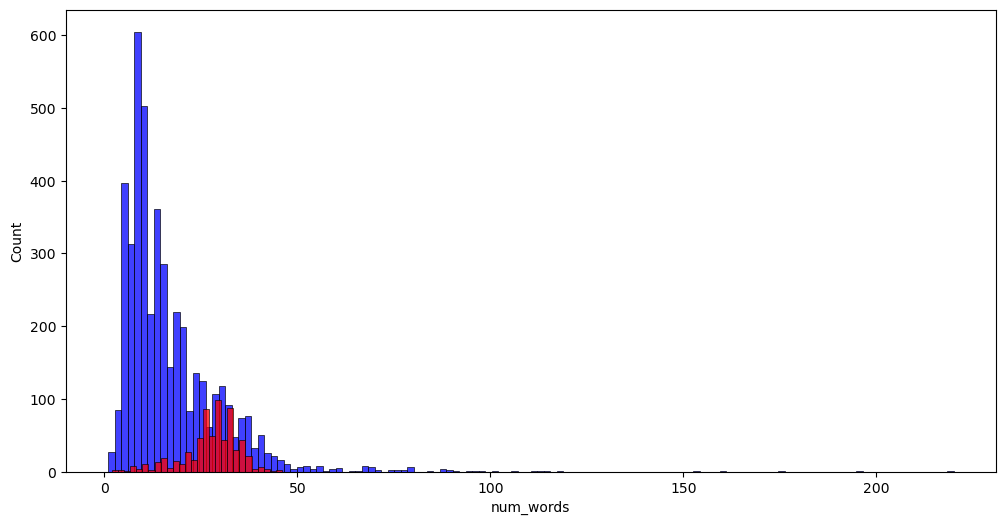

In [61]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],color='blue') # ham messages
sns.histplot(df[df['target'] == 1]['num_words'],color='red') # spam messages

In [62]:
# Our observation is validated, also we notice that outliers exist

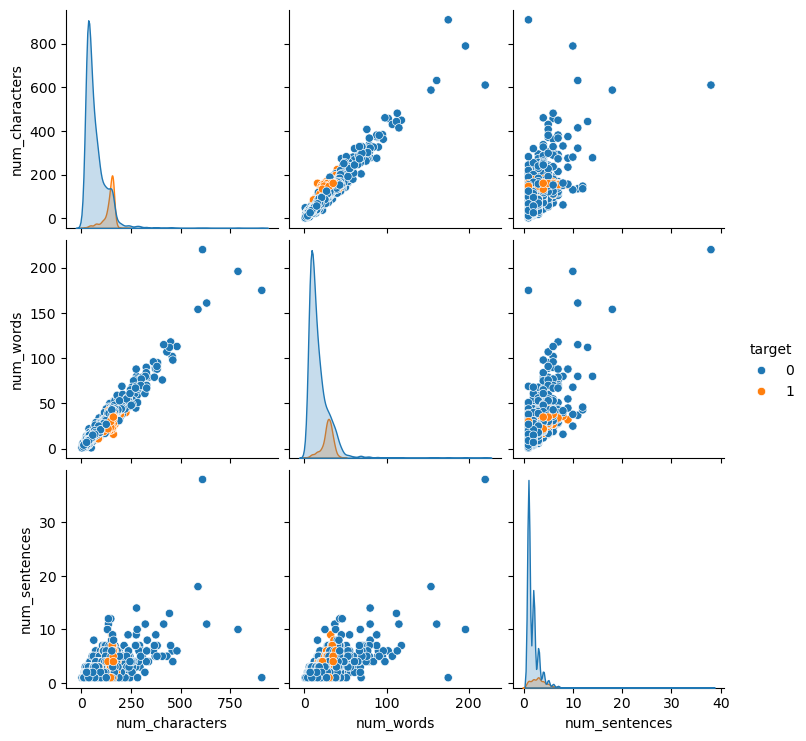

In [63]:
sns.pairplot(df,hue='target')

<Axes: >

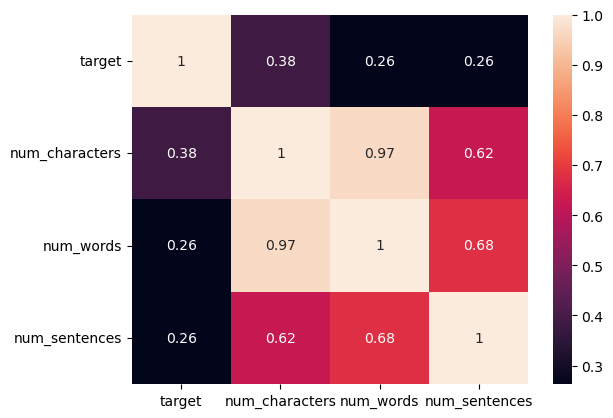

In [65]:
# To calculate the correlation coefficients
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

In [67]:
# Observing the correlation coefficients, we decide to use num_characters for our model

# STEP 3 : Data Preprocessing
Series of steps which we will perform: 
- Lower case  
- Tokenization  
- Removing special characters  
- Removing stop words and punctuation  
- Stemming


In [71]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:] # cloning the list
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to C:\Users\Mozeel
[nltk_data]     Vanwani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
df['transformed_text'] = df['text'].apply(transform_text)

In [73]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

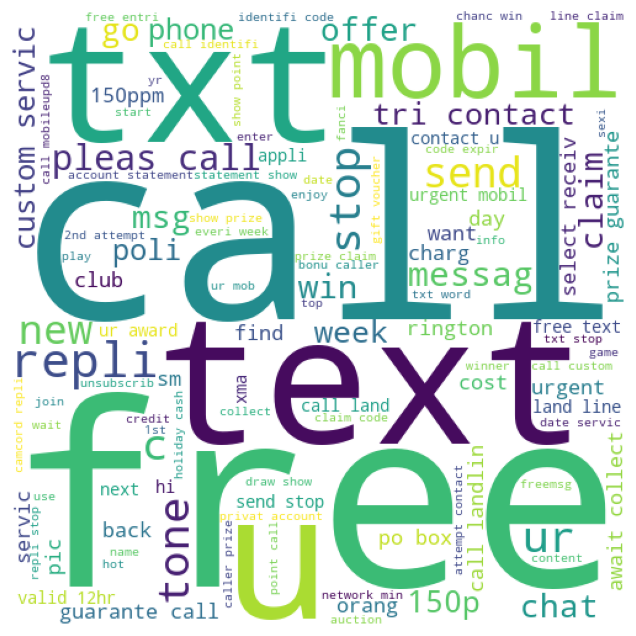

In [80]:
# To observe most occuring words in spam messages and gain insights
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

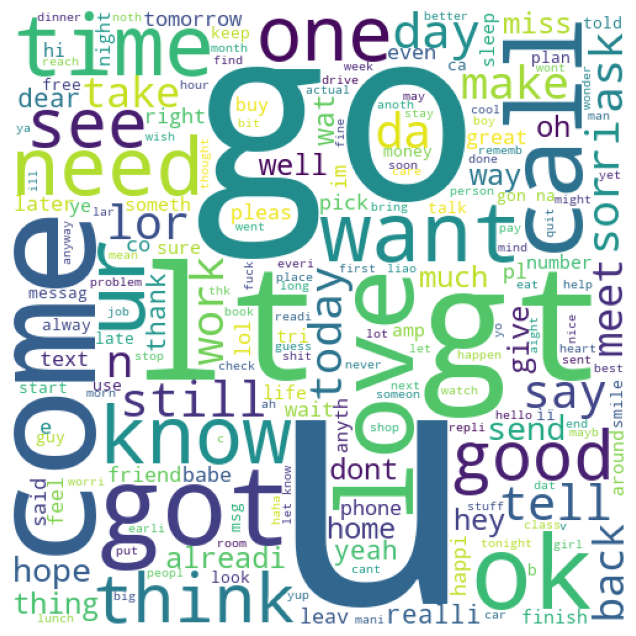

In [81]:
# To observe most occuring words in ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [83]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

<Axes: xlabel='count', ylabel='word'>

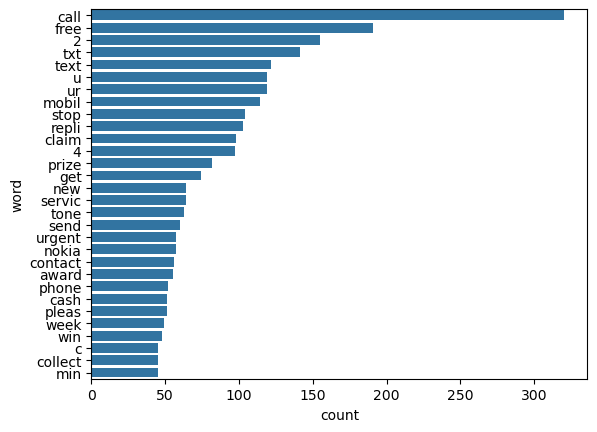

In [86]:
# To get the most frequently occurring words in spam messages
from collections import Counter
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_words.columns = ['word', 'count']
sns.barplot(x='count', y='word', data=spam_words)

<Axes: xlabel='count', ylabel='word'>

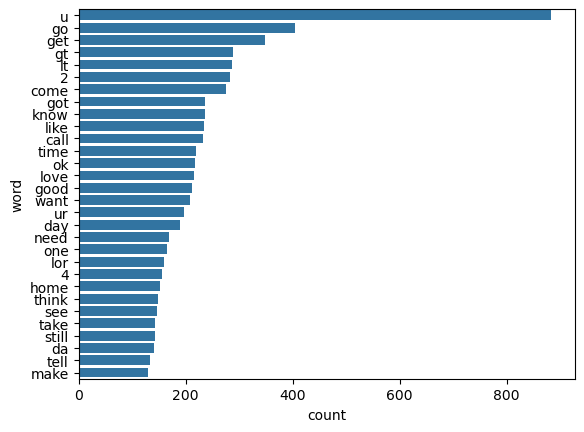

In [87]:
# To get the most frequently occurring words in spam messages
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_words.columns = ['word', 'count']
sns.barplot(x='count', y='word', data=ham_words)

# Step 4 : Building the Model
Naive Bayes Algorithm (preferred for textual data)

In [ ]:
# Step 5 : Evaluating the Model on standard metrics
# Step 6 : Improvements based on evaluation
# Step 7 : Creating and deploying the webapp

In [88]:
# Vectorizing our transformed_text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [89]:
X = cv.fit_transform(df['transformed_text']).toarray() # sparse array to dense array
X.shape

(5169, 6708)

In [90]:
y = df['target'].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [93]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [95]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [96]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [97]:
# Using alternate vectorization method
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [98]:
X = tfidf.fit_transform(df['transformed_text']).toarray() # sparse array to dense array
X.shape

(5169, 6708)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [100]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [101]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [102]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [103]:
# We will be going with TF-IDF vectorizer and Multinomial Naive Bayes model because of high precision score

In [105]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [106]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [107]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [108]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [109]:
# Example usage of our function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [110]:
# Looping over our dictionary of classification algorithms
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


D:\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9748549323017408
Precision -  0.9516129032258065


In [111]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,xgb,0.974855,0.951613
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [112]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,xgb,Accuracy,0.974855
6,AdaBoost,Accuracy,0.961315
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


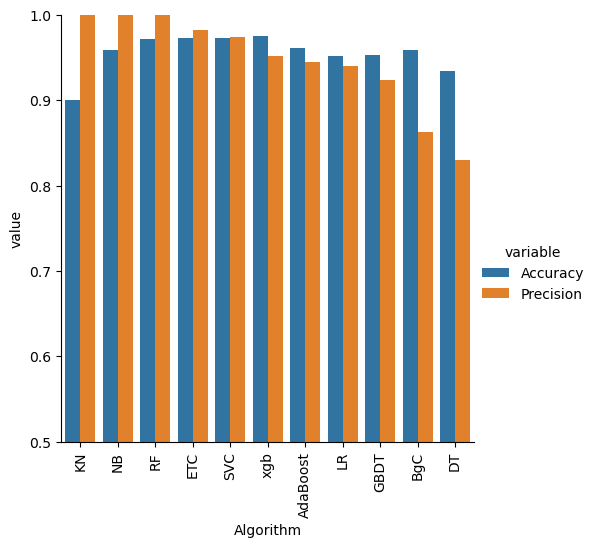

In [113]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [114]:
# Improving the model can be done by: 
# by adding max_features=3000 in TF-IDF vectorizer (gives best results)
# scaling the values in X using MinMaxScaler() (decreases precision score)
# include num_characters in input (doesn't help much)
# using a voting classifier (combination of algorithms) or applying stacking

In [115]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))